In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [37]:
dataset = pd.read_csv('./files/dataset.csv')

dataset.head()

,Feature Model,Number of Features,Number of Mandatory Features,Number of Top Features,Number of Leaf Features,Depth of Tree Max,Cognitive Complexity of Feature Model,Feature Extensibility,Flexibility of Configuration,Single Cylic Dependent Features,Multiple Cyclic Dependent Features,Number of Features Referenced in Constraints Mean,Ratio of Variability,Number of Valid Configurations,Number of Groups OR,Number of Groups XOR,Maintainability
0,RaaS,32,2,19,28,3,3,28,0.531250,0,0,0.0,4.857143,125829120.0,3,0,moderate
1,AvionFEatures,10,4,5,7,3,2,7,0.100000,0,0,0.0,2.200000,12.0,2,0,verygood
2,Bike Shop,21,3,5,15,5,5,27,0.095238,9,3,0.0,2.272727,70.0,1,4,good
3,Jetbrains,33,13,3,25,4,2,28,0.272727,3,0,2.0,3.400000,4884.0,0,2,moderate
4,Ubuntu,11,3,4,7,3,3,7,0.090909,0,0,1.0,1.857143,12.0,0,3,verygood


In [38]:
X = dataset.iloc[:, [1, 2, 4, 5, 6, 7, 14, 15]] # Correlation
# X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

X.head()

,Number of Features,Number of Mandatory Features,Number of Leaf Features,Depth of Tree Max,Cognitive Complexity of Feature Model,Feature Extensibility,Number of Groups OR,Number of Groups XOR
0,32,2,28,3,3,28,3,0
1,10,4,7,3,2,7,2,0
2,21,3,15,5,5,27,1,4
3,33,13,25,4,2,28,0,2
4,11,3,7,3,3,7,0,3


In [39]:
scaler = StandardScaler()
clf = GaussianNB()
pipeline = make_pipeline(scaler, clf)
pipeline.fit(X, y)

scores_accuracy = cross_val_score(pipeline, X, y, cv=10)

print("\n>> Accuracy")
print("Scores:", scores_accuracy)
print("Min:", np.min(scores_accuracy))
print("Max:", np.max(scores_accuracy))
print("Mean:", np.mean(scores_accuracy))
print("Standard Deviation:", np.std(scores_accuracy))

scores_precision = cross_val_score(pipeline, X, y, cv=10, scoring="precision_micro")

print("\n>> Precision")
print("Scores:", scores_precision)
print("Min:", np.min(scores_precision))
print("Max:", np.max(scores_precision))
print("Mean:", np.mean(scores_precision))
print("Standard Deviation:", np.std(scores_precision))

scores_recall = cross_val_score(pipeline, X, y, cv=10, scoring="recall_weighted")

print("\n>> Recall")
print("Scores:", scores_recall)
print("Min:", np.min(scores_recall))
print("Max:", np.max(scores_recall))
print("Mean:", np.mean(scores_recall))
print("Standard Deviation:", np.std(scores_recall))

scores_f1 = cross_val_score(pipeline, X, y, cv=10, scoring="f1_weighted")

print("\n>> F1")
print("Scores:", scores_f1)
print("Min:", np.min(scores_f1))
print("Max:", np.max(scores_f1))
print("Mean:", np.mean(scores_f1))
print("Standard Deviation:", np.std(scores_f1))

scores_roc_auc = cross_val_score(pipeline, X, y, cv=10, scoring="roc_auc_ovo_weighted")

print("\n>> ROC_AUC")
print("Scores:", scores_roc_auc)
print("Min:", np.min(scores_roc_auc))
print("Max:", np.max(scores_roc_auc))
print("Mean:", np.mean(scores_roc_auc))
print("Standard Deviation:", np.std(scores_roc_auc))


>> Accuracy
Scores: [0.6        0.62857143 0.52941176 0.61764706 0.64705882 0.5
 0.44117647 0.58823529 0.61764706 0.67647059]
Min: 0.4411764705882353
Max: 0.6764705882352942
Mean: 0.5846218487394957
Standard Deviation: 0.06890761426519924

>> Precision
Scores: [0.6        0.62857143 0.52941176 0.61764706 0.64705882 0.5
 0.44117647 0.58823529 0.61764706 0.67647059]
Min: 0.4411764705882353
Max: 0.6764705882352942
Mean: 0.5846218487394957
Standard Deviation: 0.06890761426519924

>> Recall
Scores: [0.6        0.62857143 0.52941176 0.61764706 0.64705882 0.5
 0.44117647 0.58823529 0.61764706 0.67647059]
Min: 0.4411764705882353
Max: 0.6764705882352942
Mean: 0.5846218487394957
Standard Deviation: 0.06890761426519924

>> F1
Scores: [0.62158391 0.62634921 0.5248366  0.62425895 0.63073691 0.47328489
 0.41738732 0.56973115 0.59639037 0.69130435]
Min: 0.417387318563789
Max: 0.691304347826087
Mean: 0.577586365717709
Standard Deviation: 0.07873312825718742

>> ROC_AUC
Scores: [0.89510727 0.85166928 

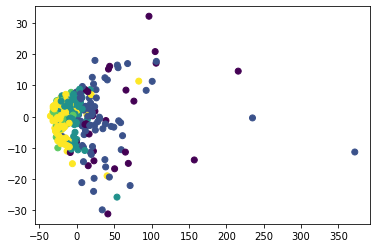

In [40]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)

X_ = pca.transform(X)

class_colors = {
    'verybad': 0,
    'bad': 1,
    'moderate': 2,
    'good': 3,
    'verygood': 4
}
y_colors = [class_colors[i] for i in y]

plt.scatter(X_[:, 0], X_[:, 1], c=y_colors)
plt.show()